# Imports


In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
import pickle

# Loading and exploaring data

## Loading data

In [145]:
eye_images = np.load('../eye_images.npy')
eye_images_flattened = eye_images.reshape(84898, 28*28)
eye_states = np.load('../eye_states.npy')

## Exploring data

In [3]:
print(f'eye_images shape : {eye_images.shape}')
print(f'eye_images_flattened shape : {eye_images_flattened.shape}')
print(f'eye_states shape : {eye_states.shape}')

eye_images shape : (84898, 28, 28)
eye_images_flattened shape : (84898, 784)
eye_states shape : (84898,)


In [4]:
eye_images

array([[[0.15728291, 0.18431373, 0.18809524, ..., 0.36078431,
         0.3570028 , 0.3570078 ],
        [0.16120448, 0.18393858, 0.18431373, ..., 0.36505102,
         0.36862745, 0.3687525 ],
        [0.16036415, 0.17689076, 0.18766006, ..., 0.37127351,
         0.37779612, 0.36554622],
        ...,
        [0.22058824, 0.24467787, 0.2672419 , ..., 0.28107743,
         0.29719888, 0.31291016],
        [0.21638655, 0.24005602, 0.26064426, ..., 0.28157763,
         0.29761905, 0.31008403],
        [0.20839836, 0.24046118, 0.26344538, ..., 0.29327731,
         0.30532213, 0.30980392]],

       [[0.34901961, 0.34901961, 0.34509804, ..., 0.22352941,
         0.20392157, 0.19607843],
        [0.35294118, 0.35686275, 0.36078431, ..., 0.21960784,
         0.20392157, 0.19607843],
        [0.37254902, 0.36470588, 0.37647059, ..., 0.22352941,
         0.20392157, 0.19215686],
        ...,
        [0.25490196, 0.25098039, 0.2627451 , ..., 0.27058824,
         0.26666667, 0.25490196],
        [0.2

In [5]:
eye_images_flattened

array([[0.15728291, 0.18431373, 0.18809524, ..., 0.29327731, 0.30532213,
        0.30980392],
       [0.34901961, 0.34901961, 0.34509804, ..., 0.2627451 , 0.25490196,
        0.24705882],
       [0.18431373, 0.18431373, 0.19502801, ..., 0.27661064, 0.29478166,
        0.31372549],
       ...,
       [0.22352941, 0.23711485, 0.24789916, ..., 0.3412515 , 0.33053221,
        0.32156863],
       [0.32256903, 0.31894758, 0.31398559, ..., 0.13779512, 0.10906363,
        0.09411765],
       [0.22282913, 0.23893557, 0.2557423 , ..., 0.32591036, 0.32698579,
        0.32156863]])

In [5]:
eye_states

array([0, 0, 0, ..., 1, 1, 1])

# Reducing dimension

In [6]:
pca = PCA(n_components=150)
eye_images_reduced = pca.fit_transform(eye_images_flattened)
eye_images_reduced.shape

(84898, 150)

In [7]:
pca.components_.shape

(150, 784)

In [8]:
pca.components_[0]

array([0.04026231, 0.04079022, 0.04125397, 0.04154411, 0.04172708,
       0.04190038, 0.04203269, 0.04193094, 0.04183138, 0.04186579,
       0.04182505, 0.04186331, 0.04206789, 0.04225215, 0.04249447,
       0.04294759, 0.04353399, 0.0441506 , 0.04451896, 0.04461841,
       0.04443238, 0.04429903, 0.04462262, 0.0454372 , 0.04622638,
       0.04670938, 0.04670536, 0.04624188, 0.04014402, 0.04045655,
       0.04045599, 0.04021715, 0.04002532, 0.0399097 , 0.03962534,
       0.03911984, 0.0387121 , 0.0383781 , 0.03805655, 0.03792206,
       0.03782335, 0.03772391, 0.03786378, 0.03844813, 0.03929132,
       0.03990625, 0.04018517, 0.04038638, 0.04053884, 0.04062993,
       0.0409896 , 0.04191048, 0.04313433, 0.04423159, 0.04488396,
       0.04501262, 0.039671  , 0.03936374, 0.03856828, 0.03751864,
       0.03658265, 0.03592986, 0.03525334, 0.03443841, 0.03378749,
       0.03337129, 0.03319493, 0.03299332, 0.03274226, 0.03257395,
       0.0327533 , 0.0335325 , 0.03445187, 0.03498185, 0.03525

limit_output extension: Maximum message size of 10000 exceeded with 10507 characters

# Exploring principal components

In [9]:
np.mean(eye_images_flattened,axis=0).shape

(784,)

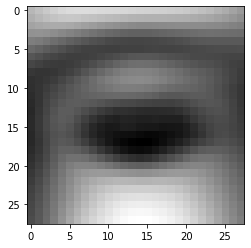

In [10]:
plt.imshow(np.mean(eye_images_flattened,axis=0).reshape((28,28)), cmap='gray');

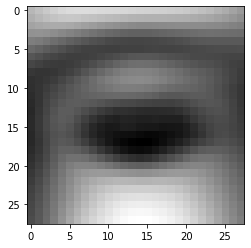

In [11]:
plt.imshow(pca.mean_.reshape((28,28)), cmap='gray');

In [12]:
pca.components_[0].shape

(784,)

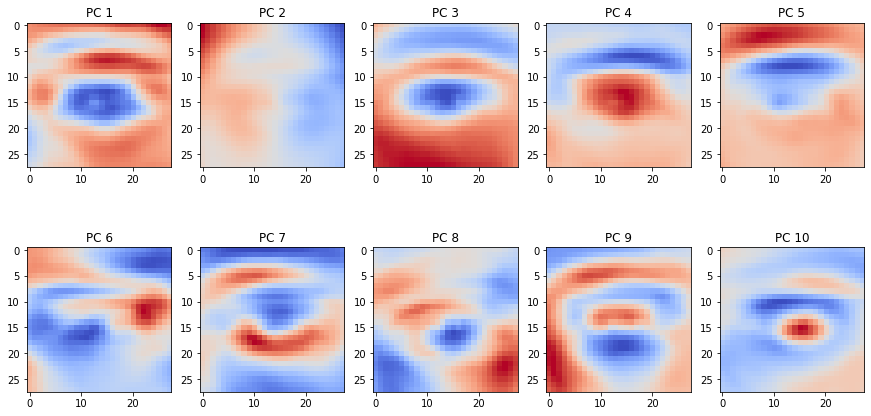

In [13]:
# Use a coolwarm map (warm = positive)
fig = plt.figure(figsize=(15,20))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.title(f'PC {i+1}', size=12)
    plt.imshow(pca.components_[i].reshape(28,28), cmap=plt.cm.coolwarm)

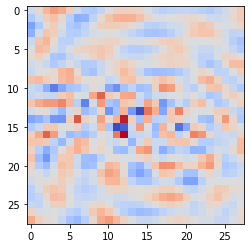

In [14]:
# Last PCs
plt.imshow(pca.components_[-1].reshape(28,28), cmap=plt.cm.coolwarm)

# Choosing the number of components

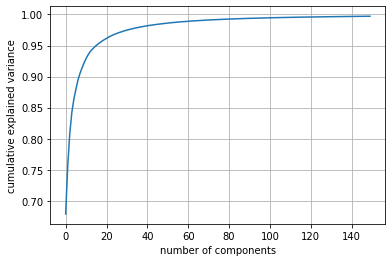

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [8]:
cumulated_variance = np.cumsum(pca.explained_variance_ratio_)
minimal_pc_count = len(cumulated_variance[cumulated_variance <= 0.8]) + 1 # fill with the right answer
minimal_pc_count

3

# Modeling

## Train test split

In [9]:
X = eye_images_flattened
y = eye_states
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Reducing dimension

In [146]:
pca = PCA(n_components=20).fit(X_train)
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

## Cross validation

In [89]:
reduction_factor = 10

idx_train =  np.random.choice(len(X_train_transformed), round(len(X_train_transformed)/reduction_factor))
images_train_small = X_train_transformed[idx_train]
labels_train_small = y_train[idx_train]

print(X_train_transformed.shape)
print(images_train_small.shape)
print(labels_train_small.shape)
print(type(images_train_small))
print(type(labels_train_small))

(59428, 3)
(29714, 3)
(29714,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [90]:
param_grid = {
    "kernel": ["rbf"],
    "C": [100, 5000],
    "gamma": [0.01, 0.1],
}
test = GridSearchCV(SVC(class_weight="balanced"), param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')

In [91]:
test = model.fit(images_train_small, labels_train_small)

In [92]:
test.best_params_

{'C': 5000, 'gamma': 0.1, 'kernel': 'rbf'}

In [147]:
model = SVC(class_weight="balanced", kernel="rbf", C=5000, gamma=0.1)

In [148]:
model.fit(X_train_transformed,y_train)

SVC(C=5000, class_weight='balanced', gamma=0.1)

In [149]:
y_pred = model.predict(X_test_transformed)

In [150]:
accuracy_score(y_test, y_pred)

0.9809579897919121

In [153]:
with open('PCA_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [154]:
PCA = pickle.load(open('PCA_model.pkl', 'rb'))
PCA

SVC(C=5000, class_weight='balanced', gamma=0.1)